# Maszyny wektorów nośnych

Maszyny wektorów nośnych (SVM) - algorytm służący do wyznaczenia granicy pomiędzy różnymi klasami danych.

Wizualizacja algorytmu [tutaj](https://www.youtube.com/watch?v=_YPScrckx28).

## Import bibliotek i wczytanie danych

Wykorzystany zostanie zbiór danych **iris** z biblioteki [scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset). 

Za pomocą SVM będę klasyfikował 3 rodzaje kwiatów (kolumna *target*).
Są to kolejno:
* 0 - Setosa
* 1 - Versicolour
* 2 - Virginica

In [46]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

df = load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Zbiór danych jest już przygotowany do uczenia, pozostaje tylko podział na zbiory **x** i **y**.

In [47]:
x = df.drop(columns=['target'])
y = df['target']

## Uczenie modelu

Do uczenia modelu wykorzystuję klasę **SVC**.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = SVC().fit(x_train, y_train)

## Mierzenie skuteczności modelu

Na początku tworzę macierz pomyłek. Wartości na głównej przekątnej to dobrze sklasyfikowane kwiaty.

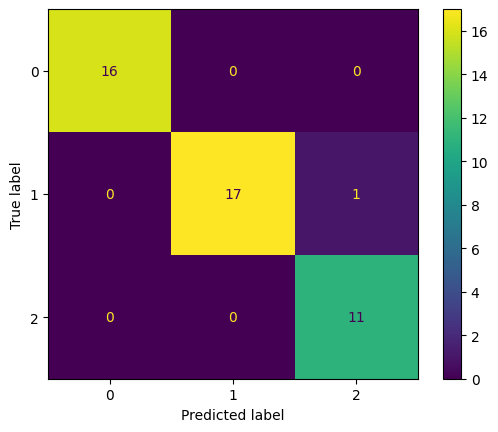

In [51]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()


Skuteczność algorytmu sprawdzam również generując raport klasyfikacji.

In [52]:
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolour", "Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
 Versicolour       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Precyzja (precision)**: odsetek poprawnych przewidywań pozytywnej klasy spośród wszystkich przypadków oznaczonych przez model jako pozytywne.

**Czułość (recall)**: odsetek rzeczywistych przypadków pozytywnych, które model poprawnie wykrył spośród wszystkich rzeczywistych pozytywów.

**Wskaźnik F1**: średnia harmoniczna precyzji i czułości, łącząca obie miary w jedną wartość.

**Dokładność (accuracy)**: odsetek poprawnie sklasyfikowanych próbek (zarówno pozytywnych, jak i negatywnych) spośród wszystkich próbek.

**Support**: zlicza ile przypadków wystąpiło w zbiorze.

**Macro avg**: średnia arytmetyczna metryk dla każdej klasy, traktując je równoważnie.

**Weighted avg**: średnia ważona według liczby próbek (supportu) w każdej klasie.
